# Projet : Analyse de données
## Objectif
- faire un rendu en barchart du CA par année
- faire un rendu en barchart du CA par année et par catégorie de produit
- afficher le taux de croissance du CA par année
- afficher le taux de croissance en "year to date" de 2023 par rapport à 2022
- afficher l'âge moyen des clients en base aujourd'hui
- calculer l'âge moyen des clients au moment d'un achat, au global (sur toutes les années), et par année (le client a fait des actions marketing pour attirer des jeunes, il veut savoir si cela fonctionne).

# Importation des librairies
On importe les librairies nécessaires pour l'analyse des données.

In [2]:
# importation des librairies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
from dateutil.relativedelta import relativedelta


# Importation des données
On importe les données du fichier `customers.csv` et du fichier `orders.csv`.

In [3]:
# import des données
data_customers = pd.read_csv('customers.csv')
data_customers.head()

,customer_unique_id,country,gender,propriétaire,habitat,nb_pages_visited,date_birth,sms_defined
0,1,France,NaN,Locataire,Locataire,4.0,1962-11-12 11:47:46.632931,yes
1,2,China,Female,Propriétaire,Propriétaire,8.0,1994-06-09 11:47:46.632931,no
2,3,China,Female,Locataire,Locataire,5.0,NaN,no
3,4,Belgium,Female,Locataire,Locataire,6.0,1989-04-28 11:47:46.632931,yes
4,5,China,NaN,Propriétaire,Locataire,6.0,1967-06-24 11:47:46.632931,no


In [4]:
# import des données
data_orders = pd.read_csv('orders.csv')
data_orders.head()

,date,customer_id,category,sub_category,price
0,2018-11-18,1,Accessories,Locks,37.2
1,2019-01-31,1,Accessories,Locks,35.7
2,2019-04-15,1,Riders gears,Shoes,24.7
3,2019-06-28,1,Riders gears,Shoes,79.5
4,2019-09-10,1,Accessories,GPS,135.8


# Exploration des données
## Table customers
On copie la table `customers` dans une nouvelle variable `df_customers` pour ne pas modifier la table d'origine. On va ensuite faire une analyse de la table.

In [5]:
# copie de la table
df_customers = data_customers.copy()

### Nombre de lignes et de colonnes


In [6]:
# Nombre de lignes et de colonnes
df_customers.shape

(2000, 8)

### Types de variables

In [7]:
# Types de variables
df_customers.dtypes

customer_unique_id     object
country                object
gender                 object
propriétaire           object
habitat                object
nb_pages_visited      float64
date_birth             object
sms_defined            object
dtype: object

1 float,
7 objects (On a 1 variable date à convertir en datetime)


### Changer les types des variables
#### customer_unique_id
La variable `customer_unique_id` est un object mais on peut la convertir en int,

In [8]:
# Rechercher s'il y a du texte dans la variable customer_unique_id
df_customers['customer_unique_id'].str.isnumeric().value_counts()

True     1999
False       1
Name: customer_unique_id, dtype: int64

Il y a du texte dans la variable sur une ligne. Pour cette ligne, le séparateur CSV, n'est pas une `,` mais `;`. on corrige ça.

In [9]:
index = df_customers[~df_customers['customer_unique_id'].str.isnumeric()].index
texte = df_customers[~df_customers['customer_unique_id'].str.isnumeric()]['customer_unique_id'].values[0]

# Remplacer la ligne d'index par le texte splité
df_customers.loc[index, 'customer_unique_id'] = texte.split(';')[0]

In [10]:
# transformation de la variable customer_unique_id en int
df_customers['customer_unique_id'] = df_customers['customer_unique_id'].astype(int)

#### date_birth

In [11]:
# transformation de la variable date_birth en datetime
df_customers['date_birth'] = pd.to_datetime(df_customers['date_birth'])
df_customers.dtypes

customer_unique_id             int64
country                       object
gender                        object
propriétaire                  object
habitat                       object
nb_pages_visited             float64
date_birth            datetime64[ns]
sms_defined                   object
dtype: object

### Analyse des valeurs manquantes

In [12]:
# nombre de valeurs manquantes par variable
df_customers.isna().sum().sort_values(ascending=False)

date_birth            316
gender                205
sms_defined             2
country                 1
propriétaire            1
habitat                 1
nb_pages_visited        1
customer_unique_id      0
dtype: int64

In [13]:
# Pourcentage de valeurs manquantes par variable
df_customers.isna().sum().sort_values(ascending=False) / df_customers.shape[0] * 100

date_birth            15.80
gender                10.25
sms_defined            0.10
country                0.05
propriétaire           0.05
habitat                0.05
nb_pages_visited       0.05
customer_unique_id     0.00
dtype: float64

→ 15,8 % de valeurs manquantes pour date_birth
→ 10,3 % de valeurs manquantes pour gender
→ 1 % ou moins de valeurs manquantes pour `sms_defined`, `country`, `propriétaire`, `habitat` et `nb_pages_visited`

Ce n'est pas bien grave, on peut les laisser comme ça, mais il faudrat en tenir compte lors des études sur l'age et le genre.

### Doublons
On recherche les doublons dans la variable `customer_unique_id` et on affiche les doublons. Cette variable est la clé de liaison avec la table `orders`.

In [14]:
# recherche des doublons dans la variable customer_unique_id
df_customers['customer_unique_id'].duplicated().value_counts()

False    1995
True        5
Name: customer_unique_id, dtype: int64

In [15]:
# afficher les doublons
df_customers[df_customers['customer_unique_id'].duplicated()]

,customer_unique_id,country,gender,propriétaire,habitat,nb_pages_visited,date_birth,sms_defined
599,4567,USA,Female,Locataire,Locataire,3.0,NaT,yes
899,4567,USA,Female,Locataire,Locataire,8.0,1984-07-31 11:47:46.632931,yes
1199,4567,France,Female,Locataire,Locataire,6.0,1950-03-13 11:47:46.632931,yes
1499,4567,Austria,Male,Propriétaire,Locataire,7.0,1978-11-10 11:47:46.632931,yes
1799,4567,USA,Female,Locataire,Propriétaire,6.0,NaT,yes


In [16]:
# recherche des doublons dans la variable customer_id de la table orders
data_orders[data_orders['customer_id']== 4567]

,date,customer_id,category,sub_category,price


On a 5 doublons, mais l'id de ces doublons ne correspondent à aucune ligne de la table order. Ils seront supprimer lors du merge.

## Table orders
On copie la table `orders` dans une nouvelle variable `df_orders` pour ne pas modifier la table d'origine. On va ensuite faire une analyse de la table.

In [17]:
df_orders = data_orders.copy()

In [18]:
# Nombre de lignes et de colonnes
df_orders.shape

(16393, 5)

In [19]:
# Types de variables
df_orders.dtypes

date             object
customer_id       int64
category         object
sub_category     object
price           float64
dtype: object

3 objects, 1 float et 1 int (On a 1 variable date à convertir en datetime)

### Changer les types des variables

In [20]:
# transformation de la variable date en datetime
df_orders['date'] = pd.to_datetime(df_orders['date'])

### Analyse des valeurs manquantes


In [21]:
# nombre de valeurs manquantes par variable
df_orders.isna().sum().sort_values(ascending=False)

date            0
customer_id     0
category        0
sub_category    0
price           0
dtype: int64

→ 0 valeurs manquantes

## Merge des 2 tables
On va faire un merge des 2 tables pour avoir une table avec toutes les données. On va utiliser la variable `customer_unique_id` comme clé de liaison.

In [22]:
# merge des 2 tables
df_merge = df_orders.merge(df_customers, how='left', left_on='customer_id', right_on='customer_unique_id', indicator=True)
df_merge

,date,customer_id,category,sub_category,price,customer_unique_id,country,gender,propriétaire,habitat,nb_pages_visited,date_birth,sms_defined,_merge
0,2018-11-18,1,Accessories,Locks,37.2,1.0,France,NaN,Locataire,Locataire,4.0,1962-11-12 11:47:46.632931,yes,both
1,2019-01-31,1,Accessories,Locks,35.7,1.0,France,NaN,Locataire,Locataire,4.0,1962-11-12 11:47:46.632931,yes,both
2,2019-04-15,1,Riders gears,Shoes,24.7,1.0,France,NaN,Locataire,Locataire,4.0,1962-11-12 11:47:46.632931,yes,both
3,2019-06-28,1,Riders gears,Shoes,79.5,1.0,France,NaN,Locataire,Locataire,4.0,1962-11-12 11:47:46.632931,yes,both
4,2019-09-10,1,Accessories,GPS,135.8,1.0,France,NaN,Locataire,Locataire,4.0,1962-11-12 11:47:46.632931,yes,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16388,2021-07-30,2000,Riders gears,Shoes,49.1,2000.0,China,Male,Locataire,Locataire,3.0,1990-02-09 11:47:46.632931,no,both
16389,2021-11-30,2000,Riders gears,Helmets,98.8,2000.0,China,Male,Locataire,Locataire,3.0,1990-02-09 11:47:46.632931,no,both
16390,2022-04-02,2000,Accessories,GPS,68.9,2000.0,China,Male,Locataire,Locataire,3.0,1990-02-09 11:47:46.632931,no,both
16391,2022-08-03,2000,Accessories,Locks,38.7,2000.0,China,Male,Locataire,Locataire,3.0,1990-02-09 11:47:46.632931,no,both


In [23]:
# nombre de lignes et de colonnes
df_merge['_merge'].value_counts()

both          16366
left_only        27
right_only        0
Name: _merge, dtype: int64

On a le même nombre de lignes dans la table orders et dans la table merge. On a donc bien fait le merge.

In [24]:
# Nombre de données seulement dans la table orders
df_merge[df_merge['_merge'] == 'left_only']

,date,customer_id,category,sub_category,price,customer_unique_id,country,gender,propriétaire,habitat,nb_pages_visited,date_birth,sms_defined,_merge
2944,2021-03-29,300,Riders gears,Helmets,128.9,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,left_only
2945,2021-08-24,300,Riders gears,Jackets,73.9,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,left_only
2946,2022-01-19,300,Riders gears,Jackets,133.1,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,left_only
2947,2022-06-16,300,Riders gears,Gloves,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,left_only
2948,2022-11-11,300,Riders gears,Jackets,95.6,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,left_only
5254,2020-03-06,600,Riders gears,Jackets,98.5,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,left_only
7544,2020-09-29,900,Accessories,Pumps,53.1,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,left_only
7545,2021-02-07,900,Bikes,Mountain Bikes,820.8,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,left_only
7546,2021-06-18,900,Riders gears,Jackets,11.3,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,left_only
7547,2021-10-27,900,Riders gears,Jackets,92.1,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,left_only


In [25]:
# liste de données seulement dans la table customers
client_absent_base_customers = df_merge[df_merge['_merge'] == 'left_only']['customer_id'].unique()
client_absent_base_customers

array([ 300,  600,  900, 1200, 1500, 1800])

On a des données manquantes sur 6 clients (id 300, 600, 900, 1200, 1500 et 1800). Je pense que ce sont des ids de test car ça forme une série de multiple de 300. A confirmer par le client. si c'est le cas on peut les supprimer.

### Clients qui n'ont pas fait d'achat
On va rechercher les clients qui n'ont pas fait d'achat.

In [26]:
unique_customers_id = set(df_customers['customer_unique_id'].unique())
unique_orders_id = set(df_orders['customer_id'].unique())

In [27]:
diff = unique_customers_id.symmetric_difference(unique_orders_id)
print("Différence entre les colonnes 'valeur1' et 'valeur2':", diff)

Différence entre les colonnes 'valeur1' et 'valeur2': {300, 600, 900, 1200, 1500, 1800, 4567}


In [28]:
df_customers[df_customers['customer_unique_id'].isin(diff)]

,customer_unique_id,country,gender,propriétaire,habitat,nb_pages_visited,date_birth,sms_defined
299,4567,China,Female,Locataire,Locataire,9.0,1983-06-04 11:47:46.632931,no
599,4567,USA,Female,Locataire,Locataire,3.0,NaT,yes
899,4567,USA,Female,Locataire,Locataire,8.0,1984-07-31 11:47:46.632931,yes
1199,4567,France,Female,Locataire,Locataire,6.0,1950-03-13 11:47:46.632931,yes
1499,4567,Austria,Male,Propriétaire,Locataire,7.0,1978-11-10 11:47:46.632931,yes
1799,4567,USA,Female,Locataire,Propriétaire,6.0,NaT,yes


On a 1 client qui n'a pas fait d'achat. c'est l'id `4567`, le même client qui été en doublons.

# Analyse univariée
## histogramme des variables numériques



In [29]:
# Supprimer la colonne customer_unique_id et _merge
df_merge.drop(columns=['customer_unique_id', '_merge'], inplace=True)

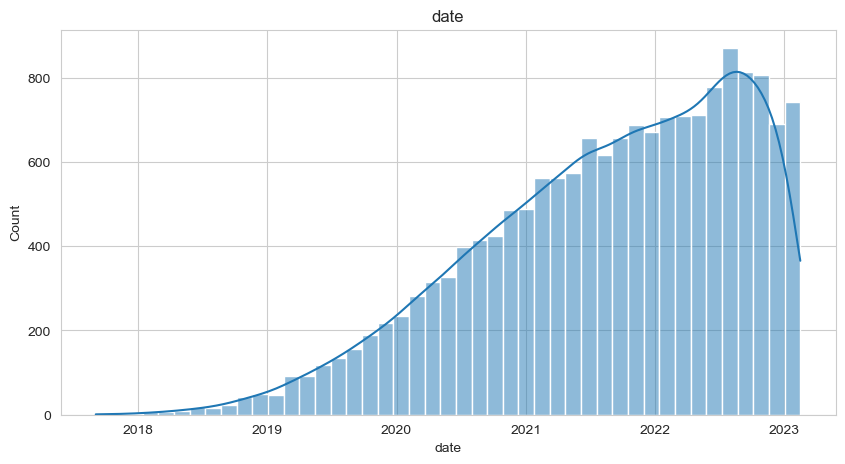

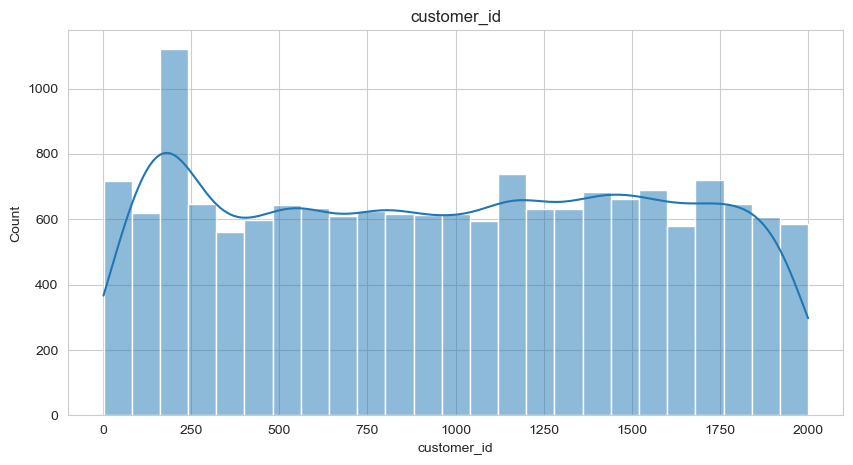

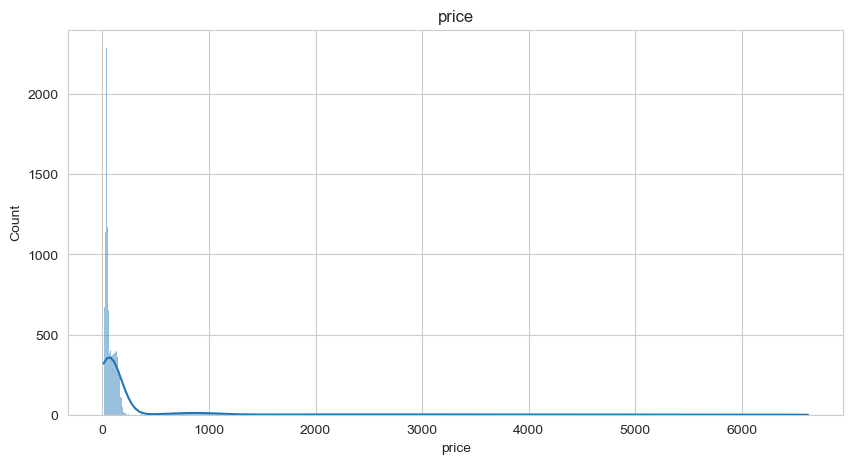

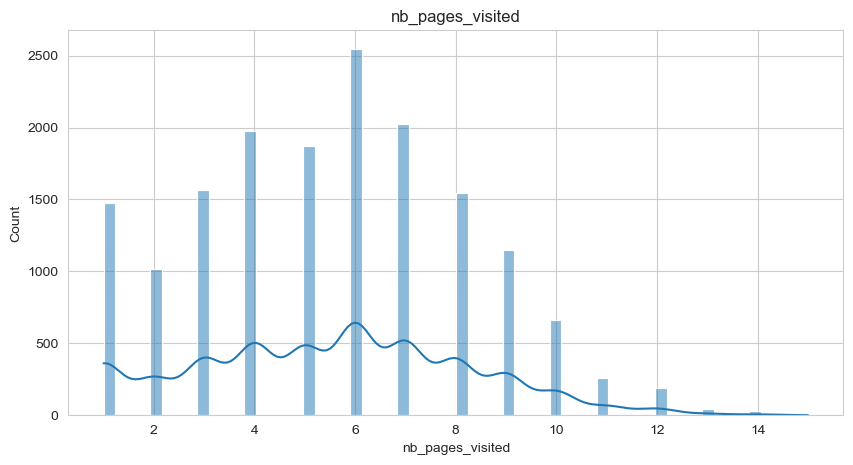

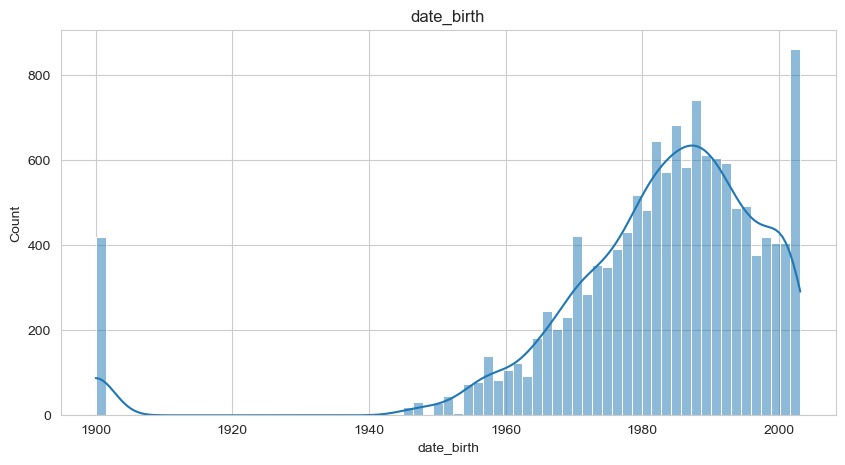

In [30]:
for col in df_merge.select_dtypes(exclude='object'):
    plt.figure(figsize=(10, 5))
    sns.histplot(data=df_merge, x=col, kde=True)
    plt.title(col)
    plt.show()

    - La variable date représentes la date d'achats et plus la date est récente plus il y a de ventes
    - La variable customer_id représente l'identifiant unique du client. On voit une distribution assez uniforme avec une tranche plus présente que les autres, c'est quelle a fait plus d'achat que les autres.
    - La plus grande partie des prix sont comprise en dessous de 1000€. On a des outliers qui vont jusqu'à 6000€.
    - On le nombre de pages visitées.
    - ON a surement une valeur aberrante pour la date de naissance avec une date en 1900.

## Analyse des valeurs aberrantes

In [31]:
# On supprime les outliers
df_merge[df_merge['date_birth'] < '1940-01-01']

,date,customer_id,category,sub_category,price,country,gender,propriétaire,habitat,nb_pages_visited,date_birth,sms_defined
299,2020-05-15,33,Riders gears,Jackets,27.7,China,NaN,Locataire,Propriétaire,10.0,1900-01-01 11:34:00,no
300,2020-11-19,33,Accessories,Locks,32.6,China,NaN,Locataire,Propriétaire,10.0,1900-01-01 11:34:00,no
301,2021-05-26,33,Riders gears,Helmets,135.2,China,NaN,Locataire,Propriétaire,10.0,1900-01-01 11:34:00,no
302,2021-11-30,33,Riders gears,Gloves,26.9,China,NaN,Locataire,Propriétaire,10.0,1900-01-01 11:34:00,no
303,2022-06-06,33,Accessories,GPS,193.0,China,NaN,Locataire,Propriétaire,10.0,1900-01-01 11:34:00,no
...,...,...,...,...,...,...,...,...,...,...,...,...
16253,2021-04-21,1980,Accessories,Pumps,32.4,Belgium,Female,Locataire,Locataire,7.0,1900-01-01 11:34:00,yes
16254,2021-09-03,1980,Riders gears,Helmets,141.1,Belgium,Female,Locataire,Locataire,7.0,1900-01-01 11:34:00,yes
16255,2022-01-16,1980,Bikes,Mountain Bikes,967.3,Belgium,Female,Locataire,Locataire,7.0,1900-01-01 11:34:00,yes
16256,2022-05-31,1980,Riders gears,Jackets,81.2,Belgium,Female,Locataire,Locataire,7.0,1900-01-01 11:34:00,yes


In [32]:
# remplacement de la valeur aberrante par nan
df_merge.loc[df_merge['date_birth'] < '1940-01-01', 'date_birth'] = np.nan

## Analyse des variables catégorielles

In [33]:
for col in df_merge.select_dtypes('object'):
    print(f'{col :-<20} {df_merge[col].unique()}')


category------------ ['Accessories' 'Riders gears' 'Bikes']
sub_category-------- ['Locks' 'Shoes' 'GPS' 'Gloves' 'Pumps' 'Jackets' 'Helmets'
 'Mountain Bikes' 'Roads' 'eBikes']
country------------- ['France' 'China' 'Belgium' 'USA' 'Austria' nan]
gender-------------- [nan 'Female' 'Male']
propriétaire-------- ['Locataire' 'Propriétaire' nan]
habitat------------- ['Locataire' 'Propriétaire' nan]
sms_defined--------- ['yes' 'no' nan]


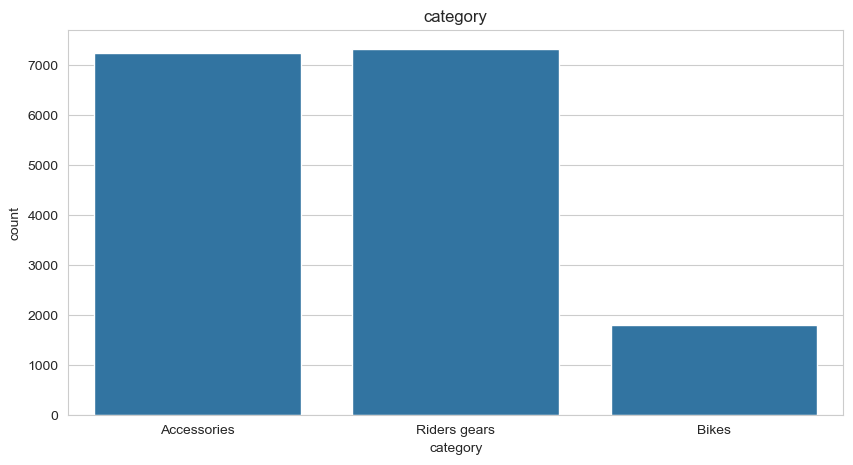

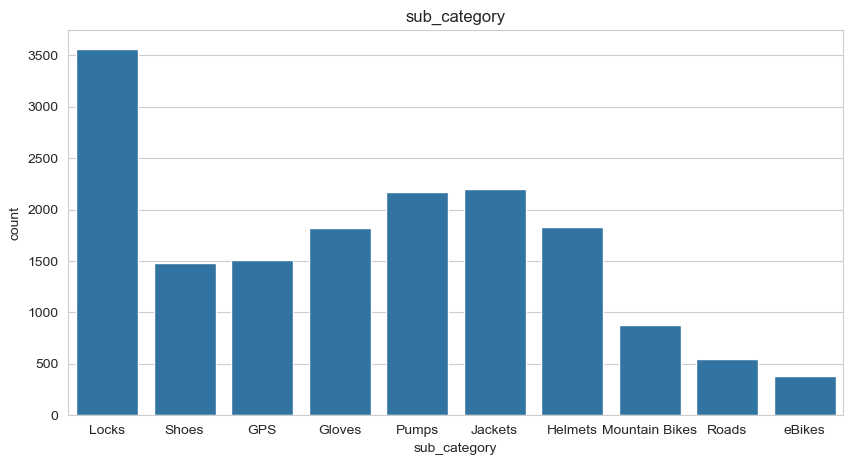

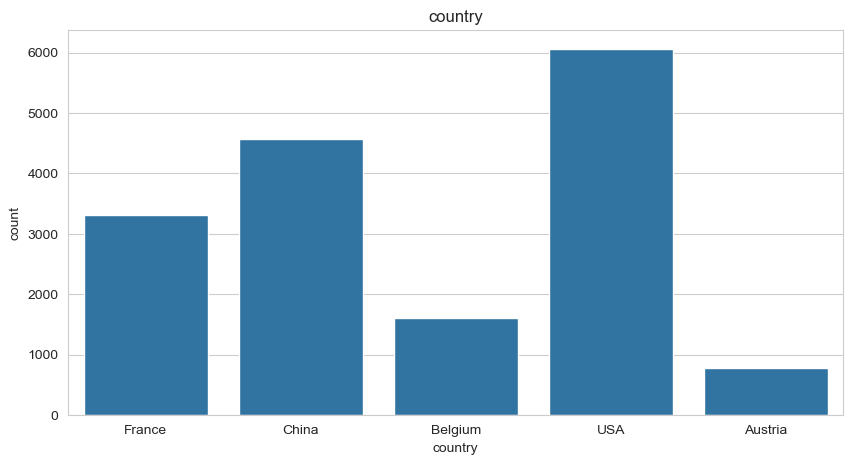

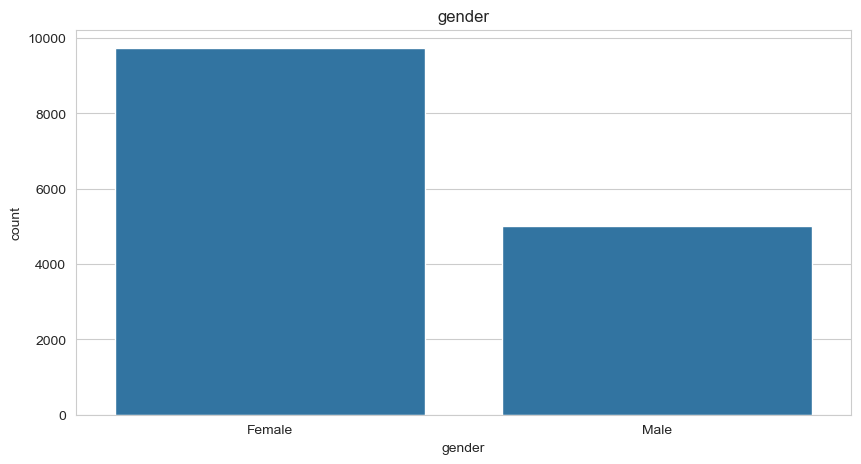

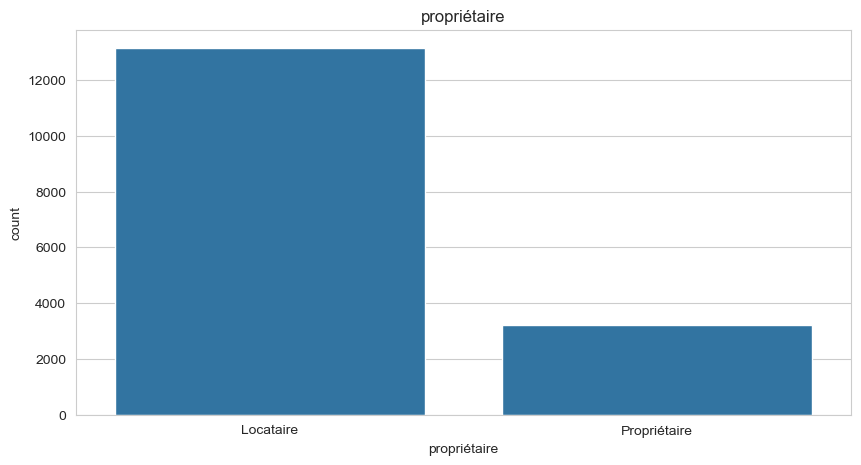

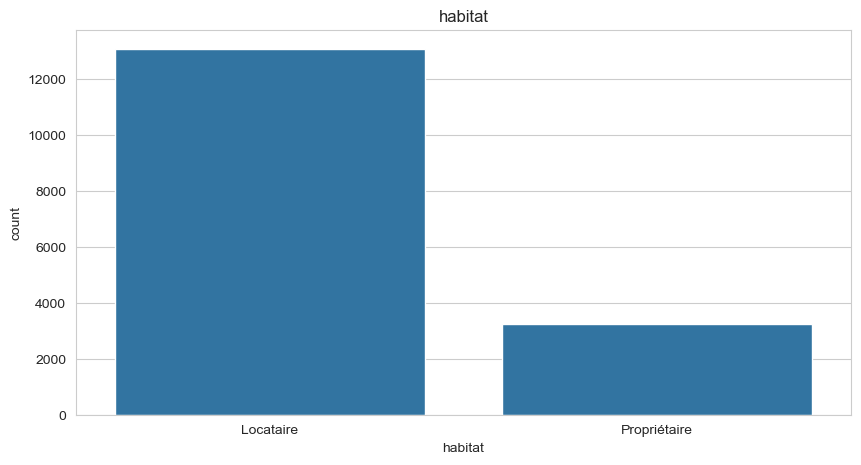

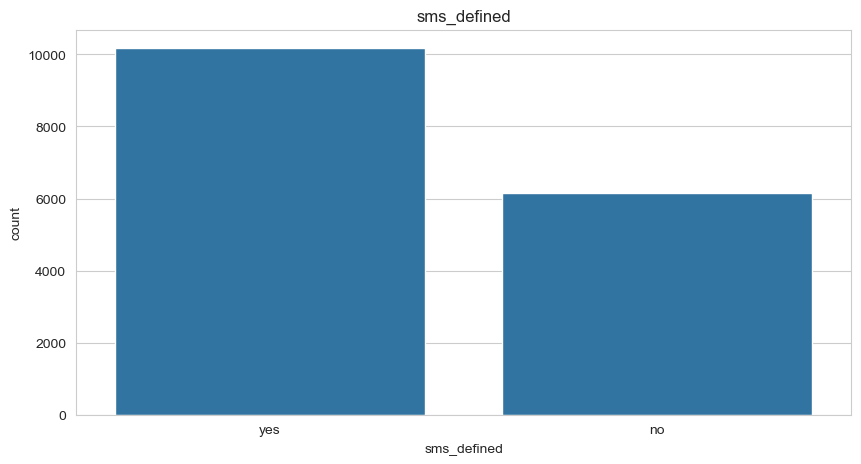

In [34]:
for col in df_merge.select_dtypes('object'):
    plt.figure(figsize=(10, 5))
    sns.countplot(x=col, data=df_merge, color=sns.color_palette("tab10")[0])
    plt.title(col)
    plt.show()

-> Il y a plus de ventes faîtes dans les catégories `Riders gears` et `Accessories` que dans la catégorie `Bikes`
-> La sous-catégorie `Locks` est la plus vendue
-> la variable propiétaire, je ne sais à quoi ça correspond, je pense que c'est pour savoir si la personne à acheté la moto ou pas.

# Analyse plus détaillée
## Chiffre d'affaires par année

In [35]:
df_groupe_par_annee = df_merge.groupby(df_merge['date'].dt.year)

In [36]:
ca_par_annee = df_groupe_par_annee['price'].sum().reset_index()

In [37]:
ca_par_annee

,date,price
0,2017,320.8
1,2018,30216.2
2,2019,215934.9
3,2020,657850.1
4,2021,1059544.3
5,2022,2282634.4
6,2023,179242.2


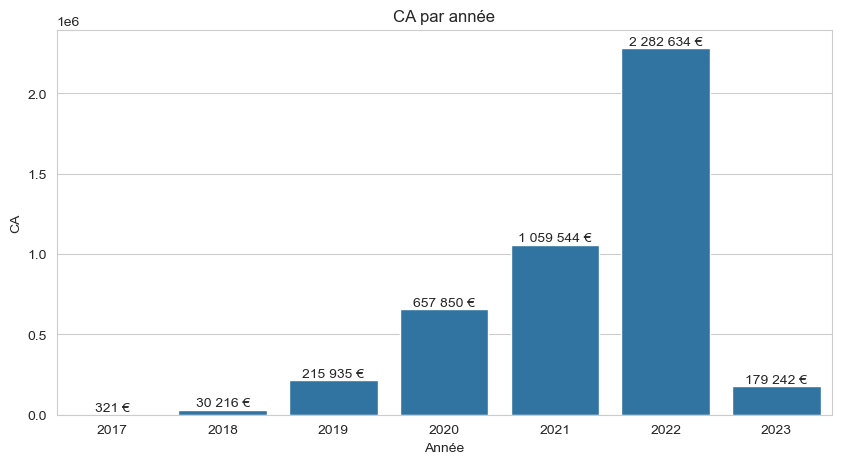

In [38]:
# On affiche le CA par année
plt.figure(figsize=(10, 5))
sns.barplot(x='date', y='price', data=ca_par_annee, color=sns.color_palette("tab10")[0])
for i, v in enumerate(ca_par_annee['price']):
    plt.text(i, v, f'{v:,.0f} €'.replace(',', ' '), ha='center', va='bottom')

plt.title('CA par année')
plt.xlabel('Année')
plt.ylabel('CA')
plt.show()

On a une forte croissance du CA

## CA par année et par catégorie

In [39]:
df_groupe_par_annee_categorie = df_merge.groupby([df_merge['date'].dt.year, 'category'])

In [40]:
ca_par_annee_categorie = df_groupe_par_annee_categorie['price'].sum().reset_index()
ca_par_annee_categorie

,date,category,price
0,2017,Accessories,179.8
1,2017,Riders gears,141.0
2,2018,Accessories,4737.4
3,2018,Bikes,19984.5
4,2018,Riders gears,5494.3
5,2019,Accessories,32108.6
6,2019,Bikes,144626.4
7,2019,Riders gears,39199.9
8,2020,Accessories,77161.4
9,2020,Bikes,468439.9


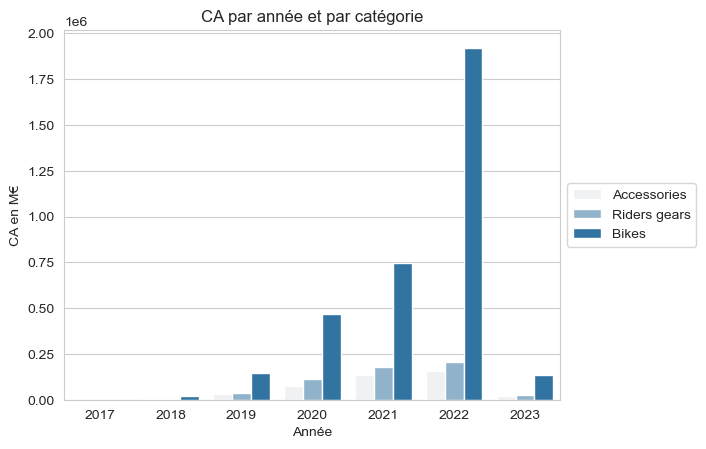

In [41]:
# On affiche le CA par année et par catégorie
plt.figure()
sns.barplot(x='date', y='price', hue='category', data=ca_par_annee_categorie, color=sns.color_palette("tab10")[0])

plt.title('CA par année et par catégorie')
plt.xlabel('Année')
plt.ylabel('CA en M€')

# Déplacer la légende à droite du graphique
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()



In [42]:
ca_par_annee_accessories = ca_par_annee_categorie[ca_par_annee_categorie['category'] == 'Accessories']
ca_par_annee_bikes = ca_par_annee_categorie[ca_par_annee_categorie['category'] == 'Bikes']
ca_par_annee_riders_gears = ca_par_annee_categorie[ca_par_annee_categorie['category'] == 'Riders gears']

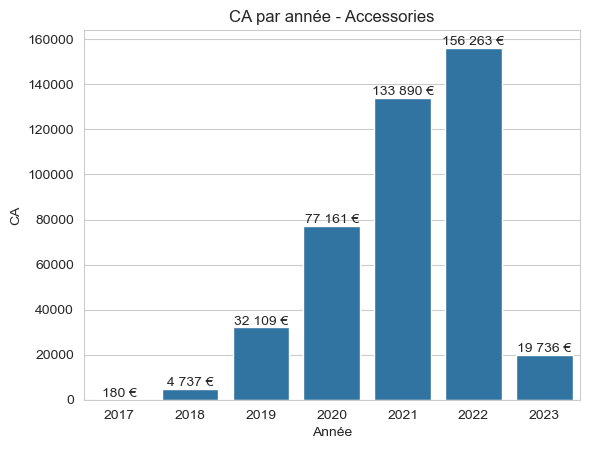

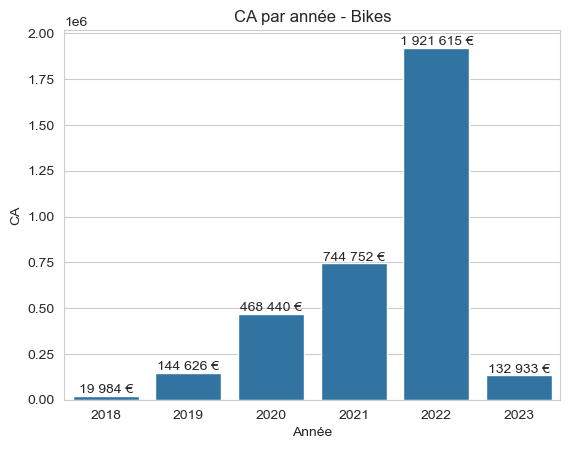

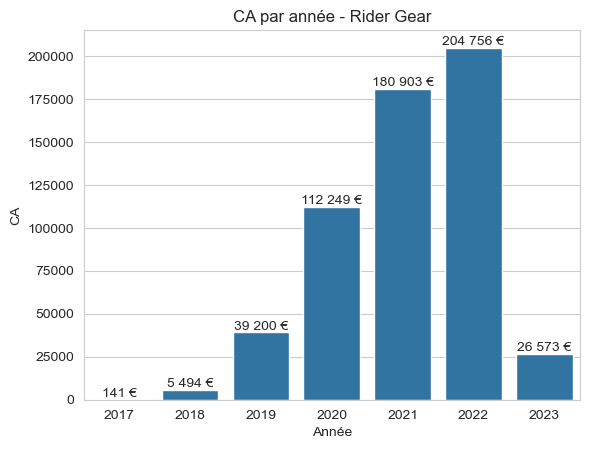

In [43]:
# Créer un dictionnaire de DataFrames avec des étiquettes de titre
data_frames = {'Accessories': ca_par_annee_accessories,
               'Bikes': ca_par_annee_bikes,
               'Rider Gear': ca_par_annee_riders_gears}

# Itérer à travers chaque DataFrame et créer un graphique à barres
for title, df in data_frames.items():
    plt.figure()
    sns.barplot(x='date', y='price', data=df, color=sns.color_palette("tab10")[0])
    for i, v in enumerate(df['price']):
        plt.text(i, v, f'{v:,.0f} €'.replace(',', ' '), ha='center', va='bottom')

    plt.title('CA par année' + ' - ' + title)
    plt.xlabel('Année')
    plt.ylabel('CA')
    plt.show()

On voit que la catégorie `bike` rapporte le meilleur CA, mais c'est surement parce que les prix sont plus important.

In [44]:
# répartition du CA par catégorie en 2022
ca_par_annee_categorie_2022 = ca_par_annee_categorie[ca_par_annee_categorie['date'] == 2022]
ca_par_annee_categorie_2022

,date,category,price
14,2022,Accessories,156263.1
15,2022,Bikes,1921615.3
16,2022,Riders gears,204756.0


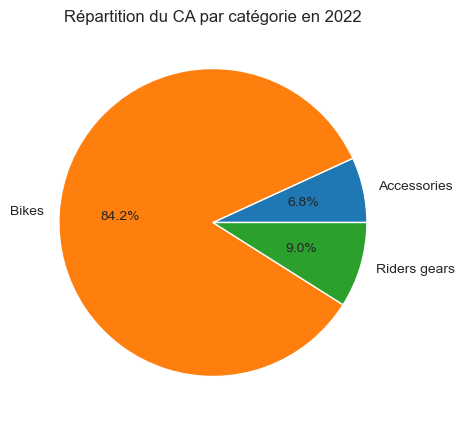

In [45]:
# graphique en camembert
plt.figure(figsize=(10, 5))
plt.pie(ca_par_annee_categorie_2022['price'], labels=ca_par_annee_categorie_2022['category'], autopct='%1.1f%%', colors=sns.color_palette("tab10"))
plt.title('Répartition du CA par catégorie en 2022')
plt.show()


Comme on peut le voir, la catégorie `bike` représente plus de 80 % du CA en 2022

## Taux de croissance du CA par année

In [46]:
# On calcule le taux de croissance du CA par année
taux_croissance_ca = ca_par_annee['price'].pct_change().reset_index()
taux_croissance_ca = taux_croissance_ca.rename(columns={'index': 'date', 'price': 'taux_croissance'})

# ajouter l'année dans le dataframe
taux_croissance_ca['date'] = taux_croissance_ca['date'] + 2017


# supprimer la première ligne
taux_croissance_ca = taux_croissance_ca.drop(taux_croissance_ca.index[0])


# transformer le taux de croissance en pourcentage
taux_croissance_ca['taux_croissance'] = taux_croissance_ca['taux_croissance'] * 100
taux_croissance_ca

,date,taux_croissance
1,2018,9319.014963
2,2019,614.632879
3,2020,204.652050
4,2021,61.061661
5,2022,115.435485
6,2023,-92.147573


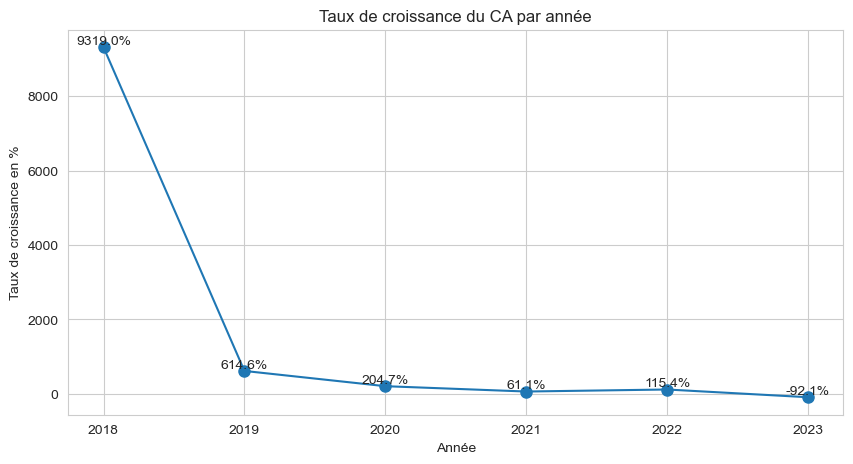

In [47]:
# On affiche le taux de croissance du CA par année

plt.figure(figsize=(10, 5))
plt.plot('date', 'taux_croissance', data=taux_croissance_ca, color=plt.get_cmap('tab10').colors[0], marker='o', markersize=8)
for i, row in taux_croissance_ca.iterrows():
    plt.text(row['date'], row['taux_croissance'], str(round(row['taux_croissance'], 1)) + '%', ha='center', va='bottom')

plt.title('Taux de croissance du CA par année')
plt.xlabel('Année')
plt.ylabel('Taux de croissance en %')
plt.show()

## Taux de croissance en "year to date" de 2023 par rapport à 2022

In [48]:
# On calcule le taux de croissance en "year to date" de 2023 par rapport à 2022
df_merge['annee'] = df_merge['date'].dt.year
annee_actuelle = df_merge[df_merge['annee'] == 2023]
annee_precedente = df_merge[df_merge['annee'] == 2022]

annee_actuelle_ytd = annee_actuelle[annee_actuelle['date'] <= dt.datetime.now()]['price'].sum()
annee_precedente_ytd = annee_precedente[annee_precedente['date'] <= dt.datetime.now() - relativedelta(years=1)]['price'].sum()

taux_croissance_ca_ytd = (annee_actuelle_ytd - annee_precedente_ytd) / annee_precedente_ytd * 100
print("Le taux de croissance en year to date de 2023 par rapport à 2022 est de ", round(taux_croissance_ca_ytd, 1), "%")

Le taux de croissance en year to date de 2023 par rapport à 2022 est de  -10.9 %


### Afficher l'âge moyen des clients en base aujourd'hui


In [49]:
# On calcule l'âge moyen des clients en base aujourd'hui
df_customers['age'] = 2023 - df_customers['date_birth'].dt.year
print("l'age moyen des clients en base aujourd'hui est de ",round(df_customers[df_customers['age']< 100]['age'].mean(),0), " ans")

l'age moyen des clients en base aujourd'hui est de  40.0  ans


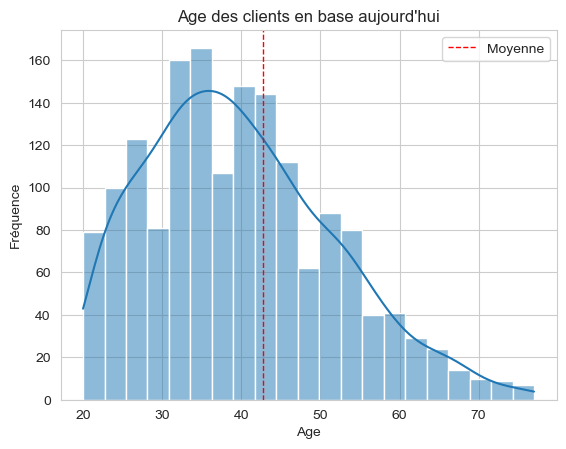

In [56]:
# On affiche l'âge des clients en base aujourd'hui
sns.histplot(df_customers[df_customers['age'] < 100]['age'].dropna(), color=sns.color_palette("tab10")[0], kde=True)
plt.title('Age des clients en base aujourd\'hui')
plt.xlabel('Age')
plt.ylabel('Fréquence')
plt.axvline(df_customers['age'].mean(), color='r', linestyle='dashed', linewidth=1, label='Moyenne')
plt.legend()
plt.show()




## Calculer l'âge moyen des clients au moment d'un achat, au global

In [58]:
# On calcule l'âge moyen des clients au moment d'un achat, au global
df_merge['age_achat'] = df_merge['date'].dt.year - df_merge['date_birth'].dt.year
print("l'age moyen des clients en base aujourd'hui est de ",round(df_merge['age_achat'].mean(),0), " ans")

l'age moyen des clients en base aujourd'hui est de  37.0  ans


## Afficher l'âge moyen des clients au moment d'un achat par année

In [59]:
# on groupe l'age d'achat par année
df_groupe_par_annee_age = df_merge.groupby(df_merge['date'].dt.year)['age_achat'].mean().reset_index()
df_groupe_par_annee_age

,date,age_achat
0,2017,42.500000
1,2018,34.735714
2,2019,35.031390
3,2020,35.914103
4,2021,37.382958
5,2022,38.475743
6,2023,39.573482


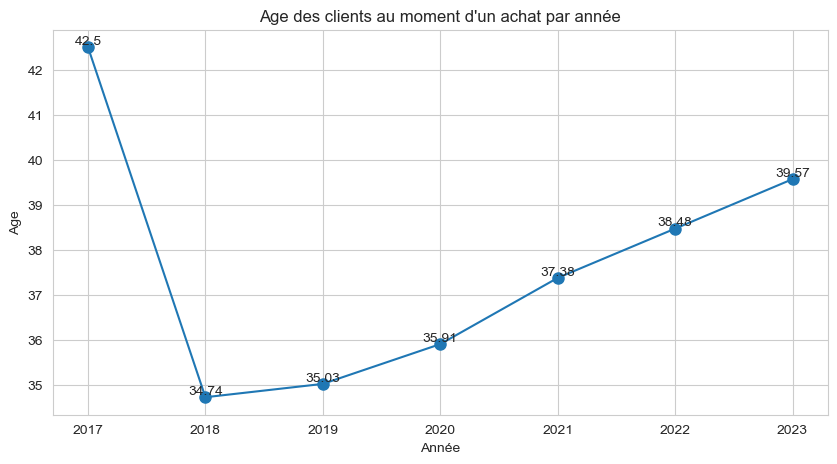

In [60]:
# On affiche l'âge des clients au moment d'un achat par année
plt.figure(figsize=(10, 5))
plt.plot('date', 'age_achat', data=df_groupe_par_annee_age, color=plt.get_cmap('tab10').colors[0], marker='o', markersize=8)
for i, row in df_groupe_par_annee_age.iterrows():
    plt.text(row['date'], row['age_achat'], str(round(row['age_achat'], 2)), ha='center', va='bottom')
plt.title('Age des clients au moment d\'un achat par année')
plt.xlabel('Année')
plt.ylabel('Age')
plt.show()


On remarque que l'âge moyen des clients au moment d'un achat augmente d'une année par an. Pour 2017, c'est le début de l'activité de la société, les données ne sont donc pas représentatives.

## Top des sous-catégories les plus vendues

In [54]:
# On calcule le top des sous-catégories les plus vendus en 2022
top_sous_categorie_2022 = df_merge[df_merge['date'].dt.year == 2022].groupby('sub_category')['price'].sum().reset_index().sort_values(by='price', ascending=False).head(10)
top_sous_categorie_2022

,sub_category,price
9,eBikes,879074.8
7,Roads,750025.1
5,Mountain Bikes,292515.4
2,Helmets,82597.0
0,GPS,73059.0
3,Jackets,72337.3
4,Locks,51464.3
8,Shoes,33772.6
6,Pumps,31739.8
1,Gloves,16049.1


On remarque que la sous-catégorie `bike` performe très bien en termes de chiffre d'affaires, car les produits de cette sous-catégorie sont vendus à un prix élevé.